In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def load_data():
    path = 'tender/TenderHack_Москва_train_data.xlsx'
    data = pd.read_excel(path)
    return data

In [20]:
data = load_data()

In [45]:
data[data['Статус']=='Активна']

id   Статус                                    Наименование КС  \
37          51  Активна  Мясо кур, в том числе цыплят (включая цыплят-б...   
64          81  Активна                             Поставка бытовой химии   
206        252  Активна  Шприц без иглы, вариант исполнения: Шприц "Омн...   
254        308  Активна  Краска интерьерная EVEREST А24. PREMIUM силико...   
601        721  Активна              Дезинфицирующее средство Профидез-ОФА   
...        ...      ...                                                ...   
245940  287497  Активна               Поставка продуктов питания (бакалея)   
246445  288087  Активна  Поставка лекарственных препаратов для медицинс...   
246573  288228  Активна                           МЕБЕЛЬ ОБЩЕГО НАЗНАЧЕНИЯ   
246651  288321  Активна                     СРЕДСТВА ДЛЯ СПАСЕНИЯ С ВЫСОТЫ   
246695  288372  Активна                              Говядина замороженная   

                                                   ОКПД 2  \
37                                           10.12.10.110   
64      17.22.11.110;17.22.11.110;20.41.31.130;20.41.3...   
206                                                   NaN   
254                                                   NaN   
601                                                   NaN   
...                                                   ...   
245940  10.89.13.112;10.89.13.112;10.41.54.000;10.20.2...   
246445  21.20.10.239;21.20.10.239;21.20.10.239;21.20.1...   
246573                                                NaN   
246651                                                NaN   
246695                          10.11.31.110;10.11.31.110   

                                                     КПГЗ  \
37                                                    NaN   
64                                                    NaN   
206                                     01.02.10.42.22.08   
254                                     01.11.03.05.05.01   
601                                        01.02.10.55.01   
...                                                   ...   
245940                                                NaN   
246445                                                NaN   
246573  01.16.03.07;01.16.04.01;01.16.07.02.02;01.16.2...   
246651                      01.04.01.13.03;01.04.01.13.03   
246695                                                NaN   

                               Регион       НМЦК  Итоговая цена  \
37                             Сургут  296100.00            0.0   
64                           Пермский    8033.00            0.0   
206                            Москва  132000.00            0.0   
254                            Москва   30690.00            0.0   
601                            Москва  106000.00            0.0   
...                               ...        ...            ...   
245940  Кемеровская область - Кузбасс   63000.00            0.0   
246445  Кемеровская область - Кузбасс     972.00            0.0   
246573                         Москва  593991.34            0.0   
246651                         Москва   80914.00            0.0   
246695                         Сургут  460000.00            0.0   

                           Дата  Участники  Ставки  \
37      2021-10-13 11:47:20.633          0       0   
64      2022-08-29 14:21:52.683          0       0   
206     2022-11-30 09:46:02.180          0       0   
254     2022-11-30 12:27:02.343          1       1   
601     2022-11-30 09:04:04.753          2       3   
...                         ...        ...     ...   
245940  2022-08-30 06:42:59.090          0       0   
246445  2021-08-06 07:23:53.460          0       0   
246573  2022-11-30 09:36:03.070          2       2   
246651  2022-11-30 10:14:01.117          2       7   
246695  2022-01-20 09:00:00.000          0       0   

                                     ИНН  downfall_pct  
37      03158b7dd4d1259be7d808e38e7a5e2c           1.0  
64      e2665e6d987cdc398b24de217dc95c62 

In [46]:
data.head()

id         Статус                                    Наименование КС  \
0   0      Завершена                                 СТУЛЬЯ УЧЕНИЧЕСКИЕ   
1   1  Не состоялась                    МЕДИЦИНСКИЕ РАСХОДНЫЕ МАТЕРИАЛЫ   
2   3      Завершена                             Видеокарта Palit PCI-E   
3   4      Завершена  ТОВАРЫ ИНФОРМАЦИОННО-ТЕХНОЛОГИЧЕСКИЕ, СРЕДСТВА...   
4   5      Завершена                                      Пинцет острый   

  ОКПД 2                                               КПГЗ  Регион      НМЦК  \
0    NaN                      01.06.01.03.01;01.06.01.03.01  Москва  596790.0   
1    NaN                   01.02.10.50.33;01.02.10.43.05.01  Москва    4964.9   
2    NaN                                        01.13.17.08  Москва  462000.0   
3    NaN  01.13.11.03.02;01.13.04.04.06.05;01.10.04.04.0...  Москва  505555.0   
4    NaN                                  01.02.10.06.48.04  Москва    2000.0   

   Итоговая цена                     Дата  Участники  Ставки  \
0      593806.05  2021-06-30 11:20:05.720          1       1   
1           0.00  2022-10-04 09:16:04.770          0       0   
2      311850.00  2021-07-01 13:23:09.177          6      65   
3      460042.90  2021-03-16 10:42:20.810          6      18   
4        1980.00  2022-05-26 11:04:42.597          2       2   

                                ИНН  downfall_pct  
0  d8912494ba2edd3bfeba55206a78a0f5      0.005000  
1  237a5c57a66f02f8deb152e21f33863a      1.000000  
2  040f1570117a744d529f4675f827a50f      0.325000  
3  c00c03dca0274fe43fc34e974434a927      0.090024  
4  cc997efa7a6742b6119a3c253a084e80      0.010000

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246762 entries, 0 to 246761
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               246762 non-null  int64  
 1   Статус           246762 non-null  object 
 2   Наименование КС  246762 non-null  object 
 3   ОКПД 2           22550 non-null   object 
 4   КПГЗ             224212 non-null  object 
 5   Регион           246762 non-null  object 
 6   НМЦК             246762 non-null  float64
 7   Итоговая цена    246762 non-null  float64
 8   Дата             246762 non-null  object 
 9   Участники        246762 non-null  int64  
 10  Ставки           246762 non-null  int64  
 11  ИНН              246762 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 22.6+ MB


In [22]:
data.corr()

/var/folders/cs/2g5m6qs920x2c75_zsz4cmwr0000gn/T/ipykernel_4783/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


id      НМЦК  Итоговая цена  Участники    Ставки
id             1.000000 -0.001619      -0.000596   0.000002  0.000488
НМЦК          -0.001619  1.000000       0.918110   0.068110  0.027008
Итоговая цена -0.000596  0.918110       1.000000   0.052806 -0.018159
Участники      0.000002  0.068110       0.052806   1.000000  0.749631
Ставки         0.000488  0.027008      -0.018159   0.749631  1.000000

In [23]:
data["downfall_pct"] = 1.0 - data["Итоговая цена"] / data["НМЦК"]

In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
data = data[data['Статус']=='Завершена']
data['ОКПД 2'] = data['ОКПД 2'].fillna(-1)
data['КПГЗ'] = data['КПГЗ'].fillna(-1)

In [70]:
X = data.drop(["Итоговая цена", "Ставки", "downfall_pct", "id", "ИНН", "Участники"], axis=1)
y = data['downfall_pct']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [73]:
# Main imports
from catboost import CatBoostRegressor
from catboost import cv
from catboost import Pool
import matplotlib.pyplot as plt

In [74]:
cat_features = X.select_dtypes('object').columns.to_list()
cat_features

['Статус', 'Наименование КС', 'ОКПД 2', 'КПГЗ', 'Регион', 'Дата']

In [75]:
cat = CatBoostRegressor(learning_rate=0.1, 
                        cat_features=cat_features, 
                        iterations=300,
                        loss_function = 'MAE')

In [78]:
cat.fit(X_train, y_train)

0:	learn: 0.1456064	total: 474ms	remaining: 2m 21s
1:	learn: 0.1436095	total: 534ms	remaining: 1m 19s
2:	learn: 0.1418076	total: 676ms	remaining: 1m 6s
3:	learn: 0.1404233	total: 783ms	remaining: 57.9s
4:	learn: 0.1391808	total: 942ms	remaining: 55.6s
5:	learn: 0.1381552	total: 1.07s	remaining: 52.5s
6:	learn: 0.1372887	total: 1.17s	remaining: 48.9s
7:	learn: 0.1365311	total: 1.26s	remaining: 46.2s
8:	learn: 0.1358840	total: 1.36s	remaining: 43.9s
9:	learn: 0.1349656	total: 1.43s	remaining: 41.6s
10:	learn: 0.1341862	total: 1.54s	remaining: 40.4s
11:	learn: 0.1335165	total: 1.63s	remaining: 39.1s
12:	learn: 0.1328806	total: 1.71s	remaining: 37.7s
13:	learn: 0.1324379	total: 1.78s	remaining: 36.3s
14:	learn: 0.1319982	total: 1.88s	remaining: 35.7s
15:	learn: 0.1316460	total: 1.92s	remaining: 34.1s
16:	learn: 0.1313984	total: 2s	remaining: 33.3s
17:	learn: 0.1310908	total: 2.06s	remaining: 32.3s
18:	learn: 0.1308630	total: 2.16s	remaining: 31.9s
19:	learn: 0.1306476	total: 2.23s	remainin

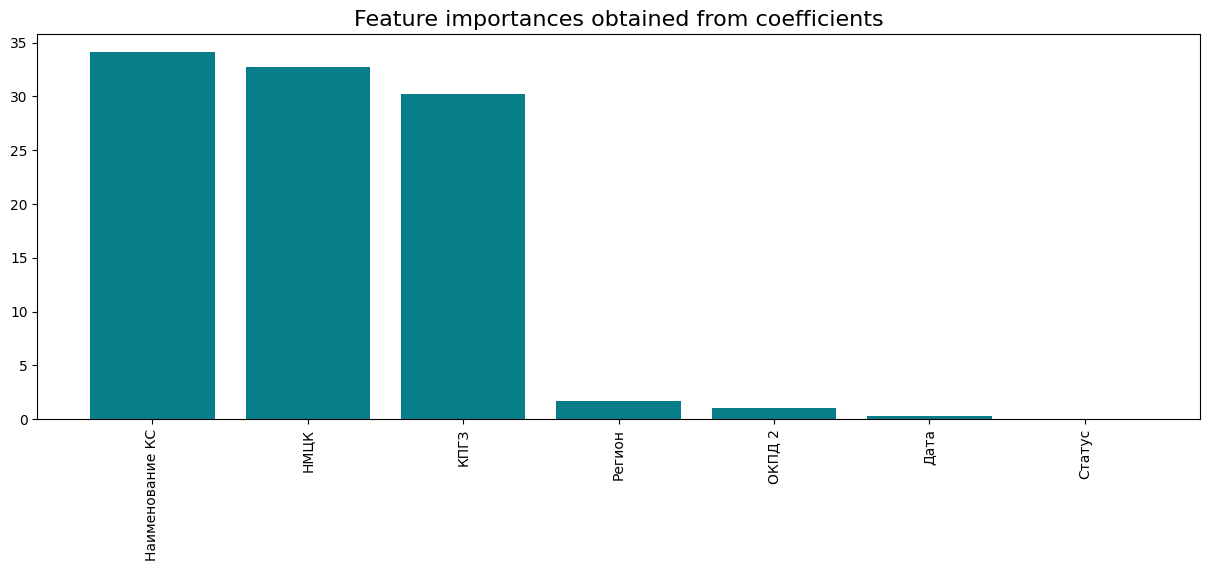

In [79]:
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": cat.feature_importances_
})

sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(x=sorted_importances['Feature'], height=sorted_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=16)
plt.xticks(rotation='vertical')
plt.show()

In [81]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import precision_score

y_pred = cat.predict(X_test)
precision = r2_score(y_test, y_pred)
score = mean_absolute_error(y_test, y_pred)

print("[INFO] R2 is: ", precision)
print("[INFO] MAE is: ", score)

[INFO] R2 is:  0.1468541310631024
[INFO] MAE is:  0.12247235689525296


In [83]:
cat.save_model('bad_model.pickle')